## Importing the stock prediction data



In [9]:
import yfinance as yf 

In [10]:
sp500 = yf.Ticker("^GSPC")

In [11]:
sp500 = sp500.history(period="max")

In [12]:
sp500 #sp500 is the prediction dataframe

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,0.0,0.0
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,0.0,0.0
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000,0.0,0.0


In [13]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-07-31 00:00:00-04:00', '2025-08-01 00:00:00-04:00',
               '2025-08-04 00:00:00-04:00', '2025-08-05 00:00:00-04:00',
               '2025-08-06 00:00:00-04:00', '2025-08-07 00:00:00-04:00',
               '2025-08-08 00:00:00-04:00', '2025-08-11 00:00:00-04:00',
               '2025-08-12 00:00:00-04:00', '2025-08-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24520, freq=None)

## Cleaning the data


<Axes: xlabel='Date'>

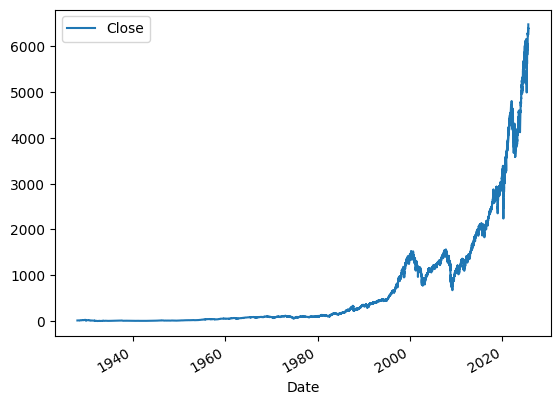

In [14]:
sp500.plot.line(y='Close', use_index=True)

In [15]:
del sp500['Dividends']
del sp500['Stock Splits']

## Setting up the target for machine learning (more cleaning only)


In [16]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000,6445.759766


In [18]:
sp500["Target"] = ((sp500["Tomorrow"] > sp500["Close"]).astype(int))

In [19]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195,0
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000,6445.759766,1


In [20]:
sp500 = sp500.loc["1990-01-01":].copy() #.copy avoid pandas basic errors

# Training an initial machine learning  model




In [21]:
from sklearn.ensemble import RandomForestClassifier #supports decision trees

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # if the re-run the model twice it will give the same results

#time series data
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) #using the predictors to train the model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [23]:
import pandas as pd

preds = pd.Series(preds, index=test.index) # putting them in a pandas series

In [24]:
precision_score(test["Target"], preds) # v less prediction score

0.59375

In [25]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

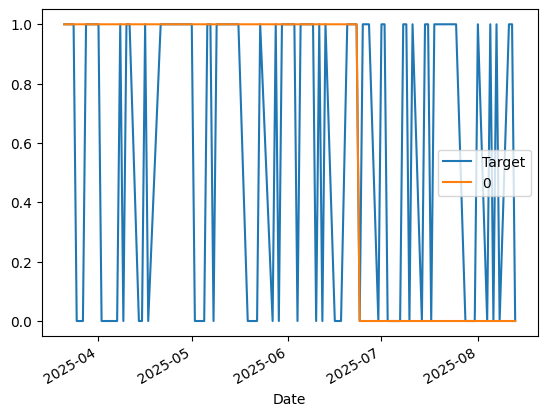

In [26]:
combined.plot()

# Building the backtesting system

In [27]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined
#backtesting by taking 10 years of data, and training a data by an year after an year.

In [28]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy() # training set for 10 years straight
    test = data.iloc[i:(i+step)].copy() # testing set for 10 years straight
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [29]:
predictions = backtest(sp500, model, predictors)

In [30]:
predictions["Predictions"].value_counts()

Predictions
0    3805
1    2665
Name: count, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["Predictions"]) #not good

0.5298311444652908

In [32]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.536785
0    0.463215
Name: count, dtype: float64

# Adding additional predictors to our model


In [33]:
horizons = [2,5,60,250,1000] #we'll calculate the mean for these days and the find the ratio in todays trading price and previous trading prices
new_predictors = []

for horizon in horizons: #looping through the horizons
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors.append(ratio_column)
  new_predictors.append(trend_column)

In [34]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1,0.999601,1.0,1.004684,2.0,1.035508,35.0,1.082850,144.0,1.322830,529.0
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195,0,1.003885,1.0,1.007684,3.0,1.042158,35.0,1.090499,144.0,1.332614,529.0
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000,6445.759766,1,0.998746,1.0,1.003783,2.0,1.038191,34.0,1.087004,143.0,1.328752,528.0


In [35]:
sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0,1.003628,1.0,1.005506,2.0,1.037735,36.0,1.084560,144.0,1.324405,530.0
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1,0.999601,1.0,1.004684,2.0,1.035508,35.0,1.082850,144.0,1.322830,529.0
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195,0,1.003885,1.0,1.007684,3.0,1.042158,35.0,1.090499,144.0,1.332614,529.0


# Improving the model

In [36]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [37]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  # Predict probabilities instead of classes
  preds = model.predict_proba(test[predictors])[:, 1] # Predict the probability of the target being 1 (price going up)
  preds[preds >= .6] = 1  # Set a threshold for buying
  preds[preds < .6] = 0  # Otherwise, don't buy
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3799
1,2666


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"]) #52% the price would go up in stock from 1993 to present

0.5296324081020255